# GPU in colab
First, you'll need to enable GPUs for the notebook:
*   Navigate to Edit→Notebook Settings
*   select GPU from the Hardware Accelerator drop-down


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

# Exercise 1
In notebook 3, was is reasonable to stop the training after 5 epochs? 
We will check that. Your tasks are:

1) Import the Fashion MNIST dataset.

2) Create the same neural network used in Notebook 3. 

3) Traing it until it overfits (accuracy on test becumes smaller than the one on the training dataset).

4) Then plot the history (loss and accuracy curves). 

5) Evaluate your model

What is the maximum validation accuracy that you obtained? How many epochs did you train your network for?


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
unique_y = np.unique(y_train)
numb_labels = unique_y.size # total number of labels
unique_y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, numb_labels)
y_test =  tf.keras.utils.to_categorical(y_test, numb_labels)

In [ ]:
X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
X_train = X_train/255 
X_test = X_test/255

In [ ]:
print(X_train.min(), X_train.max())

0.0 1.0


In [ ]:
mnist_model = tf.keras.Sequential()
mnist_model.add(tf.keras.layers.Flatten())
mnist_model.add(tf.keras.layers.Dense(32, activation="relu"))
mnist_model.add(tf.keras.layers.Dense(16, activation="relu"))
mnist_model.add(tf.keras.layers.Dense(numb_labels, activation='softmax'))

loss = 'categorical_crossentropy'

metrics = ["accuracy"] # metrics need to be in a list format
# we may want to have more metrics

# select learning rate for the optimizer
learning_rate = 1e-02 # this is 10^(-2)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

mnist_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "mnist_model.h5",  # file for our weights
    monitor="val_accuracy",  # we monitor validation accuracy
    verbose=1,  # how verbal the model is,
    save_best_only=True, # we only want to save the best weights
    mode='max' # we want maximal validation accuracy, if the monotir was validation loss then we would like to have the mode to be min instead
    )

callbacks_list = [checkpoint] # there may be more callbacks so we save it inside the list

In [ ]:
EPOCHS = 25
history = mnist_model.fit(
    X_train,
    y_train, 
    epochs=EPOCHS, 
    validation_data=(X_test, y_test), 
    callbacks=callbacks_list)

Epoch 1/25
1867/1875 [============================>.] - ETA: 0s - loss: 0.9066 - accuracy: 0.6909
Epoch 1: val_accuracy improved from -inf to 0.78000, saving model to mnist_model.h5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9055 - accuracy: 0.6913 - val_loss: 0.6428 - val_accuracy: 0.7800
Epoch 2/25
1872/1875 [============================>.] - ETA: 0s - loss: 0.5461 - accuracy: 0.8131
Epoch 2: val_accuracy improved from 0.78000 to 0.80510, saving model to mnist_model.h5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5461 - accuracy: 0.8132 - val_loss: 0.5448 - val_accuracy: 0.8051
Epoch 3/25
1855/1875 [============================>.] - ETA: 0s - loss: 0.4870 - accuracy: 0.8315
Epoch 3: val_accuracy improved from 0.80510 to 0.82670, saving model to mnist_model.h5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4866 - accuracy: 0.8316 - val_loss: 0.4947 - val_accuracy: 0.8267
Epoch 4/25
1864/1875 [===========================

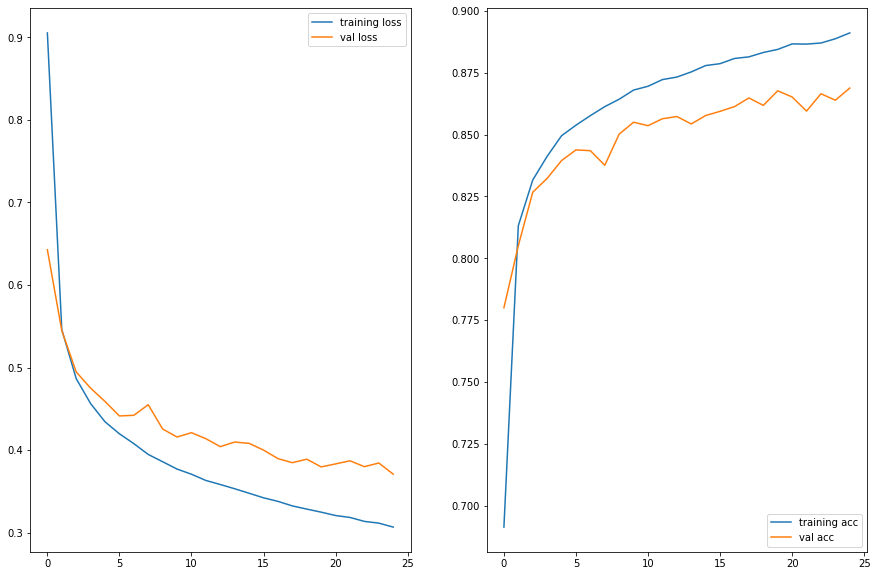

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="training acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend(loc='lower right')

plt.show()

# Exercise 2

Now build your own model for MNIST, experiment with 
- the number of nodes in the hidden layers, 
- the number of hidden layers, 
- the size of the learning rate.
- activation functions in hidden layers, e.g. ReLu, sigmoid, tanh.
- different optimizers: Adam, Adagrad, Nadam

Here are some observations:

- Underfitting occurs when there are too few neurons in the hidden layers 
- Too many neurons in the hidden layers may result in overfitting
- The optimal number of nodes of the hidden layer is usually between the size of the input and size of the output layers.
- One hidden layer is sufficient for the large majority of problems.
- Adding more hidden layers slowers down the learning process (the convergence of SGD is slower). 

RULE-OF-THUMBS

Number of hidden layers equals one; and the number of neurons in that layer is the mean of the neurons in the input and output layers.

In general choosing the right architecture of the network depends on the data so you need to experiment!

Note down the best accuracy you can get.

Make and plot the confusion matrix for your best result. 









In [ ]:
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Flatten())
my_model.add(tf.keras.layers.Dense(512, activation="relu"))
my_model.add(tf.keras.layers.Dense(256, activation="relu"))
my_model.add(tf.keras.layers.Dense(64, activation="relu"))
my_model.add(tf.keras.layers.Dense(numb_labels, activation='softmax'))

In [ ]:
loss = 'categorical_crossentropy'

metrics = ["accuracy"] # metrics need to be in a list format
# we may want to have more metrics

# select learning rate for the optimizer
learning_rate = 1e-03 # this is 10^(-2)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

my_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "my_model.h5",  # file for our weights
    monitor = "val_accuracy",  # we monitor validation accuracy
    verbose = 1,  # how verbal the model is,
    save_best_only = True, # we only want to save the best weights
    mode = 'max' # we want maximal validation accuracy, if the monotir was validation loss then we would like to have the mode to be min instead
    )

callbacks_list = [checkpoint] # there may be more callbacks so we save it inside the list

In [ ]:
EPOCHS = 10

history = my_model.fit(
    X_train,
    y_train, 
    epochs=EPOCHS, 
    validation_data = (X_test, y_test), 
    callbacks = callbacks_list)

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.8265
Epoch 1: val_accuracy improved from -inf to 0.85830, saving model to my_model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4820 - accuracy: 0.8269 - val_loss: 0.3889 - val_accuracy: 0.8583
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.3609 - accuracy: 0.8661
Epoch 2: val_accuracy did not improve from 0.85830
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8664 - val_loss: 0.3862 - val_accuracy: 0.8569
Epoch 3/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8794
Epoch 3: val_accuracy improved from 0.85830 to 0.87360, saving model to my_model.h5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3260 - accuracy: 0.8793 - val_loss: 0.3586 - val_accuracy: 0.8736
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3006 - accuracy: 

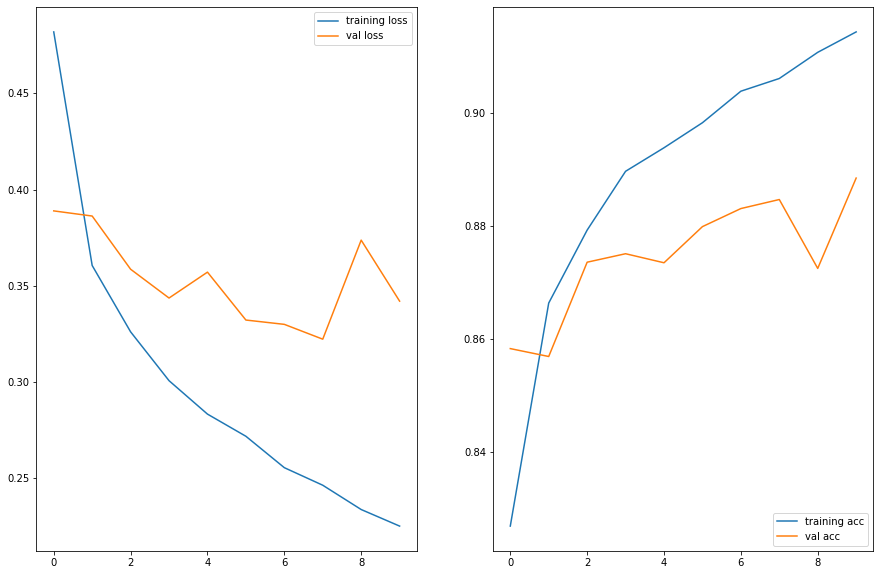

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="training acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend(loc='lower right')

plt.show()

In [ ]:
my_model.load_weights("my_model.h5") 
y_pred = my_model.predict(X_test)
y_test_flat = y_test.argmax(axis=1) # converting back from categorical to label
y_pred_flat = y_pred.argmax(axis=1) # converting back from categorical to label

In [ ]:
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat) # confusion matrix
conf_matrix

array([[864,   2,  26,  23,   2,   1,  76,   0,   6,   0],
       [  4, 967,   2,  15,   5,   0,   6,   0,   1,   0],
       [ 15,   1, 847,   7,  74,   0,  55,   0,   1,   0],
       [ 16,   2,  14, 911,  37,   0,  15,   1,   4,   0],
       [  1,   1, 131,  25, 780,   0,  61,   0,   1,   0],
       [  0,   0,   1,   0,   0, 968,   0,  18,   2,  11],
       [149,   0, 101,  30,  50,   0, 659,   0,  11,   0],
       [  0,   0,   0,   0,   0,  13,   0, 962,   0,  25],
       [  2,   0,   8,   5,   2,   3,   2,   5, 973,   0],
       [  0,   0,   0,   0,   0,  12,   1,  33,   0, 954]])

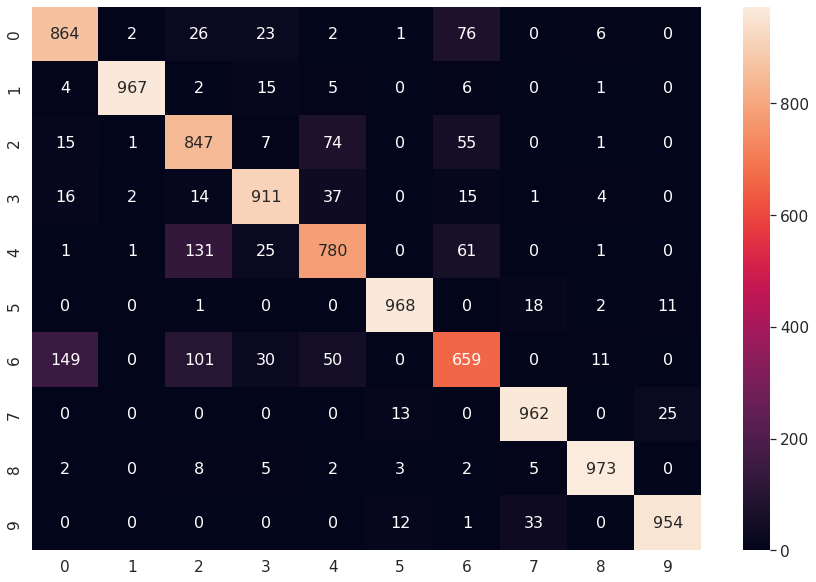

In [ ]:
index_conf = np.arange(conf_matrix.shape[0])
df_cm = pd.DataFrame(conf_matrix, index_conf, index_conf)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.show()

# Exercise 3

Load the CIFAR10 data set by 

``tf.keras.datasets.cifar10.load_data()``

1. Check the dimensionality of the data
2. Visualise the data. 
2. Preprocess data so that the y values are categorical, and re-scale the data by dividing it by 255 (if needed).  


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
unique_y = np.unique(y_train)
numb_cat = unique_y.size # total number of digits
unique_y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# first finding indices for each of digit category
unique_indc = np.zeros(numb_cat , dtype=int)
for k, item in enumerate(unique_y):
    unique_indc[k] = np.where(y_train == item)[0][0]

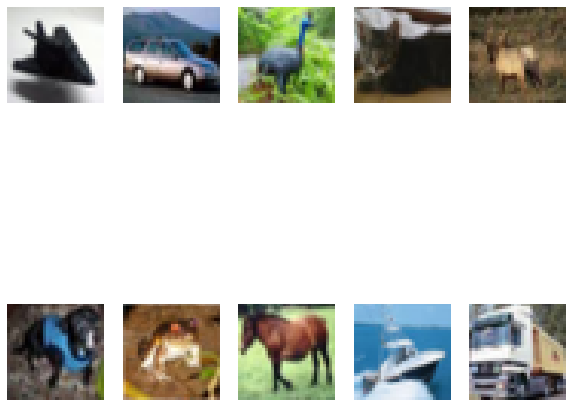

In [ ]:
nrows = 2
ncols = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
row = 0
for k, img in enumerate(X_train[unique_indc]):
    column = k%ncols
    if k==ncols:
        row+=1
    ax[row][column].imshow(img) 
    ax[row][column].axis('off')
plt.show()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, numb_cat)
y_test =  tf.keras.utils.to_categorical(y_test, numb_cat)

In [ ]:
X_train = X_train/255 
X_test = X_test/255

In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0)

# Exercise 4

Build a Feedforward Neural Network for the CIFAR10 problem. Train it, print the training and validation loss/accuracy curves. 
What is your best accuracy score? 

In [ ]:
cifar_model = tf.keras.Sequential()
cifar_model.add(tf.keras.layers.Flatten())
cifar_model.add(tf.keras.layers.Dense(517, activation="relu"))
cifar_model.add(tf.keras.layers.Dense(128, activation="relu"))
cifar_model.add(tf.keras.layers.Dense(numb_cat, activation='softmax'))

In [ ]:
loss = 'categorical_crossentropy'

metrics = ["accuracy"] # metrics need to be in a list format
# we may want to have more metrics

# select learning rate for the optimizer
learning_rate = 1e-02 # this is 10^(-2)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

cifar_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "cifar_model.h5",  # file for our weights
    monitor = "val_accuracy",  # we monitor validation accuracy
    verbose = 1,  # how verbal the model is,
    save_best_only = True, # we only want to save the best weights
    mode = 'max' # we want maximal validation accuracy, if the monotir was validation loss then we would like to have the mode to be min instead
    )

callbacks_list = [checkpoint] # there may be more callbacks so we save it inside the list

In [ ]:
EPOCHS = 10

history = cifar_model.fit(
    X_train,
    y_train, 
    epochs=EPOCHS, 
    validation_data = (X_test, y_test), 
    callbacks = callbacks_list)

Epoch 1/10
1545/1563 [============================>.] - ETA: 0s - loss: 1.8605 - accuracy: 0.3352
Epoch 1: val_accuracy improved from -inf to 0.37680, saving model to cifar_model.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8589 - accuracy: 0.3358 - val_loss: 1.7631 - val_accuracy: 0.3768
Epoch 2/10
1556/1563 [============================>.] - ETA: 0s - loss: 1.6748 - accuracy: 0.4061
Epoch 2: val_accuracy improved from 0.37680 to 0.42290, saving model to cifar_model.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6744 - accuracy: 0.4061 - val_loss: 1.6403 - val_accuracy: 0.4229
Epoch 3/10
1553/1563 [============================>.] - ETA: 0s - loss: 1.5953 - accuracy: 0.4358
Epoch 3: val_accuracy improved from 0.42290 to 0.44150, saving model to cifar_model.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5956 - accuracy: 0.4358 - val_loss: 1.5885 - val_accuracy: 0.4415
Epoch 4/10
1557/1563 [===========================

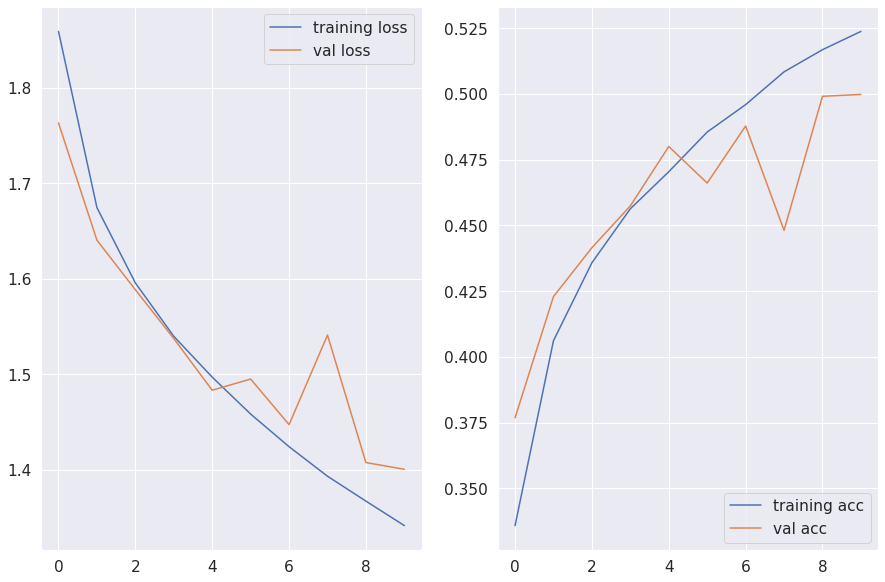

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="training acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend(loc='lower right')

plt.show()

Best accuracy about 50%. 